In [ ]:
import pandas as pd
carsales=pd.read_csv('carsales.csv')

In [ ]:
print(carsales.head())

     Month  Monthly car sales in Quebec 1960-1968
0  1960-01                                 6550.0
1  1960-02                                 8728.0
2  1960-03                                12026.0
3  1960-04                                14395.0
4  1960-05                                14587.0


In [ ]:
carsales.columns= ['month','sales']

In [ ]:
print(carsales.head())

     month    sales
0  1960-01   6550.0
1  1960-02   8728.0
2  1960-03  12026.0
3  1960-04  14395.0
4  1960-05  14587.0


In [ ]:
print(carsales.tail())

                                     month    sales
104                                1968-09  14385.0
105                                1968-10  21342.0
106                                1968-11  17180.0
107                                1968-12  14577.0
108  Monthly car sales in Quebec 1960-1968      NaN


In [ ]:
carsales=carsales.loc[0:107,:].copy()

In [ ]:
print(carsales.tail())

       month    sales
103  1968-08  16722.0
104  1968-09  14385.0
105  1968-10  21342.0
106  1968-11  17180.0
107  1968-12  14577.0


In [ ]:
carsales['period']=list(range(108))

In [ ]:
print(carsales.head())

     month    sales  period
0  1960-01   6550.0       0
1  1960-02   8728.0       1
2  1960-03  12026.0       2
3  1960-04  14395.0       3
4  1960-05  14587.0       4


In [ ]:
print(carsales.tail())

       month    sales  period
103  1968-08  16722.0     103
104  1968-09  14385.0     104
105  1968-10  21342.0     105
106  1968-11  17180.0     106
107  1968-12  14577.0     107


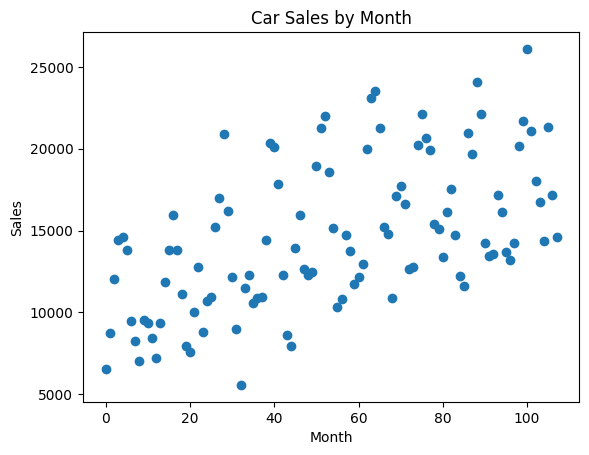

In [ ]:
from matplotlib import pyplot as plt
plt.scatter(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
x = carsales['period'].values.reshape(-1,1)
y = carsales['sales'].values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

In [ ]:
print(x)

In [ ]:
print(regressor.coef_)
print(regressor.intercept_)

[[81.20250174]]
[10250.77726809]


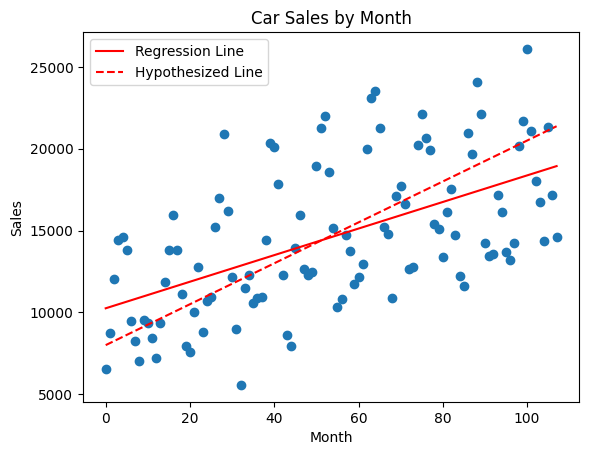

In [ ]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(carsales['period'],[81.2 * i + 10250.8 for i in \
carsales['period']],'r-',label='Regression Line')
plt.plot(carsales['period'],[125 * i + 8000 for i in
carsales['period']],'r--',label='Hypothesized Line')
plt.legend(loc="upper left")
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
saleslist=carsales['sales'].tolist()
regressionline=[81.2 * i + 10250.8 for i in carsales['period']]
hypothesizedline=[125 * i + 8000 for i in carsales['period']]
error1=[(x-y) for x, y in zip(regressionline,saleslist)]
error2=[(x-y) for x, y in zip(hypothesizedline,saleslist)]

In [ ]:
print(error1)
print(error2)

In [ ]:
import numpy as np
error1abs=[abs(value) for value in error1]
error2abs=[abs(value) for value in error2]
print(np.mean(error1abs))
print(np.mean(error2abs))

3154.3592592592595
3239.777777777778


In [ ]:
error1squared=[(value)**2 for value in error1]
error2squared=[(value)**2 for value in error2]
print(np.sqrt(np.mean(error1squared)))
print(np.sqrt(np.mean(error2squared)))

3725.491219512759
3968.900519455399


In [ ]:
def get_mae(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorabs=[abs(value) for value in error]
    mae=np.mean(errorabs)
    return(mae)
def get_rmse(line,actual):
    error=[(x-y) for x,y in zip(line,actual)]
    errorsquared=[(value)**2 for value in error]
    rmse=np.sqrt(np.mean(errorsquared))
    return(rmse)

In [ ]:
x_extended = np.append(carsales['period'], np.arange(108, 116))

In [ ]:
x_extended=x_extended.reshape(-1,1)
extended_prediction=regressor.predict(x_extended)

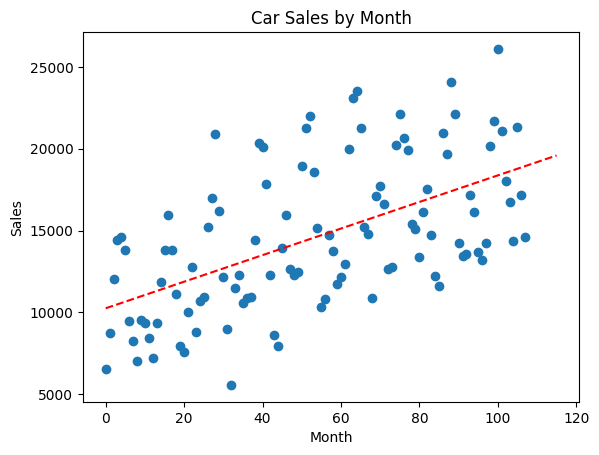

In [ ]:
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x_extended,extended_prediction,'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

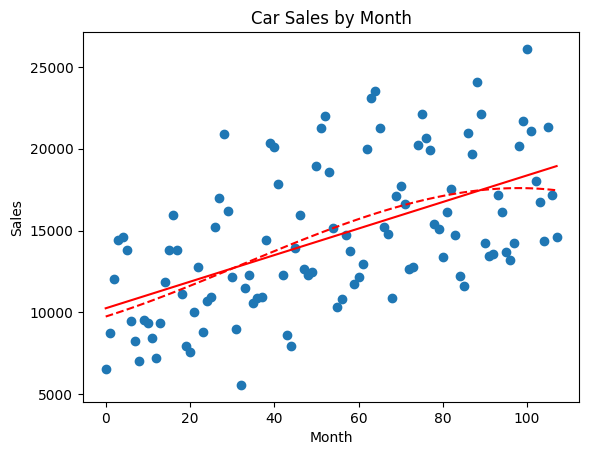

In [ ]:
carsales['quadratic']=carsales['period'].apply(lambda x: x**2)
carsales['cubic']=carsales['period'].apply(lambda x: x**3)
x3 = carsales.loc[:,['period','quadratic','cubic']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)
regressor_cubic = LinearRegression()
regressor_cubic.fit(x3, y)
plt.scatter(carsales['period'],carsales['sales'])
plt.plot(x,regressor.predict(x),'r-')
plt.plot(x,regressor_cubic.predict(x3),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
print(regressor_cubic.coef_)
print(regressor_cubic.intercept_)

[[ 8.13410634e+01  7.90279561e-01 -8.19451188e-03]]
[9746.41276055]


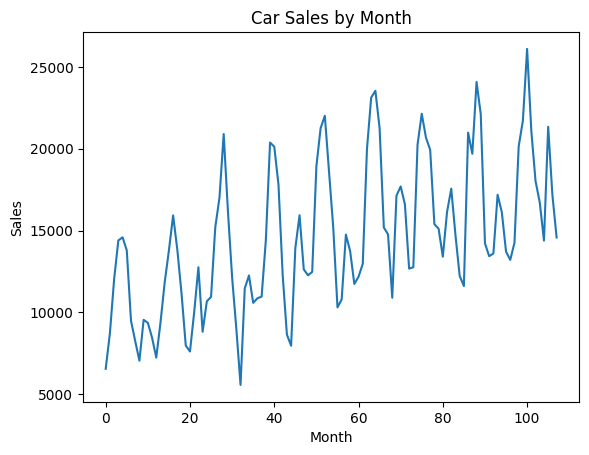

In [ ]:
from matplotlib import pyplot as plt
plt.plot(carsales['period'],carsales['sales'])
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

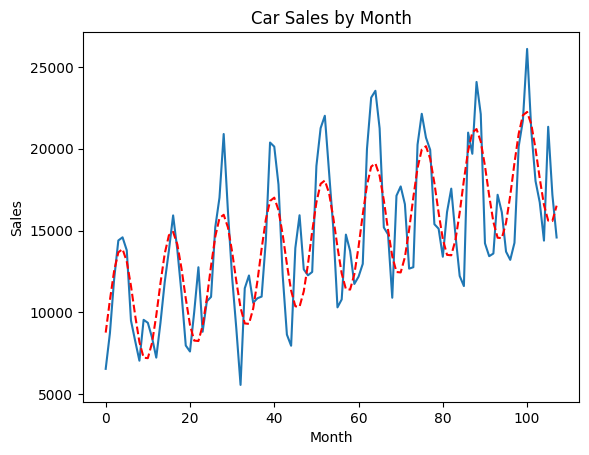

In [ ]:
import math
carsales['sin_period']=carsales['period'].apply(lambda x: math.sin(x*2*math.pi/12))
carsales['cos_period']=carsales['period'].apply(lambda x: math.cos(x*2*math.pi/12))
x_trig = carsales.loc[:,['period','sin_period','cos_period']].values.reshape(-1,3)
y = carsales['sales'].values.reshape(-1,1)
regressor_trig = LinearRegression()
regressor_trig.fit(x_trig, y)
plt.plot(carsales['period'],carsales['sales'])
plt.plot(x,regressor_trig.predict(x_trig),'r--')
plt.title('Car Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [ ]:
trig_line=regressor_trig.predict(x_trig)[:, 0]
print(get_rmse(trig_line,saleslist))

2680.5520744410464


In [ ]:
carsales['squareroot']=carsales['period'].apply(lambda x: x**0.5)
carsales['exponent15']=carsales['period'].apply(lambda x: x**1.5)
carsales['log']=carsales['period'].apply(lambda x: math.log(x+1))
x_complex = carsales.loc[:,['period','log','sin_period','cos_period', \
'squareroot','exponent15','log','quadratic', 'cubic']].values.reshape(-1,9)
y = carsales['sales'].values.reshape(-1,1)
regressor_complex = LinearRegression()
regressor_complex.fit(x_complex,y)
complex_line=[prediction for sublist in regressor_complex.predict(x_complex) \
for prediction in sublist]
print(get_rmse(complex_line,saleslist))

2610.3938122978843


In [ ]:
x_complex_train = carsales.loc[0:80,['period','log','sin_period','cos_period','squareroot', \
'exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_train = carsales.loc[0:80,'sales'].values.reshape(-1,1)
x_complex_test = carsales.loc[81:107,['period','log','sin_period','cos_period','squareroot', \
'exponent15','log','quadratic','cubic']].values.reshape(-1,9)
y_test = carsales.loc[81:107,'sales'].values.reshape(-1,1)
regressor_complex.fit(x_complex_train, y_train)

In [ ]:
x_train = carsales.loc[0:80,['period']].values.reshape(-1,1)
x_test = carsales.loc[81:107,['period']].values.reshape(-1,1)
x_trig_train = carsales.loc[0:80,['period','sin_period','cos_period']].values.reshape(-1,3)
x_trig_test = carsales.loc[81:107,['period','sin_period','cos_period']].values.reshape(-1,3)
regressor.fit(x_train, y_train)
regressor_trig.fit(x_trig_train, y_train)
complex_test_predictions=[prediction for sublist in \
      regressor_complex.predict(x_complex_test) for prediction in sublist]
test_predictions=[prediction for sublist in regressor.predict(x_test) for \
      prediction in sublist]
trig_test_predictions=[prediction for sublist in \
      regressor_trig.predict(x_trig_test) for prediction in sublist]
print(get_rmse(test_predictions,saleslist[81:107]))
print(get_rmse(trig_test_predictions,saleslist[81:107]))
print(get_rmse(complex_test_predictions,saleslist[81:107]))

4115.614379193304
3461.0823292599357
6006.013164062921
